# 0. Подготовка окружения

In [5]:
%matplotlib inline

from __future__ import print_function

import numpy as np
import pylab as pl

import matplotlib
import matplotlib.pyplot as plt

# 1. Загрузка тестовых данных

In [5]:
from sklearn import datasets
iris = datasets.load_iris()

In [41]:
iris.data.shape

(150, 4)

In [42]:
iris.target.shape

(150,)

In [8]:
np.unique(iris.target)

array([0, 1, 2])

(1797, 8, 8)


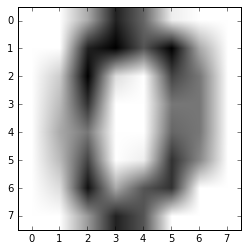

In [11]:
digits = datasets.load_digits()
print(digits.images.shape)
pl.imshow(digits.images[0], cmap=pl.cm.gray_r)

In [13]:
data = digits.images.reshape((digits.images.shape[0], -1))
print(data.shape)

(1797, 64)


## Обучение и предсказание

In [38]:
from sklearn import svm
classifier = svm.LinearSVC()
classifier.fit(iris.data, iris.target)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [39]:
classifier.predict([[ 5.0,  3.6,  1.3,  0.25], [1, 2, 3, 4]])

array([0, 2])

In [16]:
classifier.coef_

array([[ 0.1842381 ,  0.45122734, -0.80793784, -0.45071442],
       [ 0.06488207, -0.89476471,  0.39087281, -0.94004473],
       [-0.85077211, -0.9867355 ,  1.3809314 ,  1.86539531]])

# 2. Задача классификации

## kNN (k ближайших соседей)

In [18]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier()
knn.fit(iris.data, iris.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

![title](iris_knn.png)

In [19]:
knn.predict([[0.1, 0.2, 0.3, 0.4]])

array([0])

### Обучающее и контрольное множества (для бедных)

In [21]:
perm = np.random.permutation(iris.target.size)
print(perm)

iris.data = iris.data[perm]
iris.target = iris.target[perm]
knn.fit(iris.data[:100], iris.target[:100]) 
knn.score(iris.data[100:], iris.target[100:])

[146  19   2 138  75 135  41  38 142  54  18 141  89 149 107  57  26 145
  83  88 132  95  49  94 128 148 113 140  17 117  82  50  92   6   1 130
  48  36  11  93  97   4  27  96 125  24 110  47 118  44  67  84  68  99
 147 134  79 100  58 114   8 101 124  78  63  45  33 120  73 137  29  98
 106 126  85  77  56  62  86  53 103   9  51  72  90 105  42   5 109  35
 123 133  14   7 111  10  71  32  43  37  87 115  28  15 129  59  46  30
 127   3 119 139 104 121  64 116  23  55  80 108  12 102  70   0  31  16
  76  60 131 144  21  34  25  91  20  81  69  22 143  39 112  13 122  65
 136  40  66  52  61  74]


0.95999999999999996

## Метод опорных векторов (SVM, Support Vector Machine)

In [23]:
from sklearn import svm
svc = svm.SVC(kernel='linear')
svc.fit(iris.data, iris.target) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

![title](svm_margin.png)

linear | polynomial | RBF
------ | ---------- | ---
![title](svm_kernel_linear.png) | ![title](svm_kernel_poly.png) | ![title](svm_kernel_rbf.png)
svc = svm.SVC(kernel='linear')|svc = svm.SVC(kernel='poly', degree=3)|svc = svm.SVC(kernel='rbf')

# 3. Задача кластеризации

In [2]:
from sklearn import cluster, datasets
iris = datasets.load_iris()
k_means = cluster.KMeans(n_clusters=3)
print(k_means.fit(iris.data))
print(k_means.labels_[::10])
print(iris.target[::10])

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)
[1 1 1 1 1 2 2 2 2 2 0 0 0 0 0]
[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]


Реальность | Метод k-Средних (k = 3) | Метод k-Средних (k = 8)
-------- | ---------------------- | ---------------------
![title](cluster_iris_truth.png) | ![title](k_means_iris_3.png) | ![title](k_means_iris_8.png)

In [6]:
from scipy import misc
face = misc.face(gray=True).astype(np.float32)
X = face.reshape((-1, 1))  # (n_sample, n_feature)
K = k_means = cluster.KMeans(n_clusters=5)
print(k_means.fit(X))
values = k_means.cluster_centers_.squeeze()
labels = k_means.labels_
face_compressed = np.choose(labels, values)
face_compressed.shape = face.shape


KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)


Оригинал изображения | Постеризованное изображение
----------------- | -----------------------
![title](face1.png) | ![title](face_compressed.png)

# 4. Уменьшение размерности

In [9]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
print(pca.fit(iris.data))
X = pca.transform(iris.data)

PCA(copy=True, n_components=2, whiten=False)


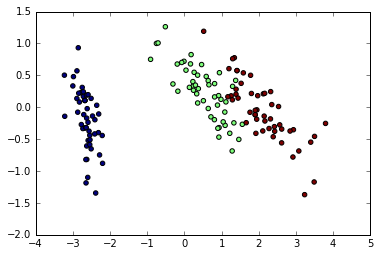

In [10]:
pl.scatter(X[:, 0], X[:, 1], c=iris.target)

# 4. Примитивное распознавание лиц

![title](faces1.png)

In [13]:
from sklearn import cross_validation, datasets, decomposition, svm

In [16]:
# Получение данных

lfw_people = datasets.fetch_lfw_people(min_faces_per_person=70, resize=0.4)
perm = np.random.permutation(lfw_people.target.size)
lfw_people.data = lfw_people.data[perm]
lfw_people.target = lfw_people.target[perm]
faces = np.reshape(lfw_people.data, (lfw_people.target.shape[0], -1))
train, test = iter(cross_validation.StratifiedKFold(lfw_people.target, n_folds=4)).next()
X_train, X_test = faces[train], faces[test]
y_train, y_test = lfw_people.target[train], lfw_people.target[test]

In [17]:
# Уменьшение размерности задачи

pca = decomposition.RandomizedPCA(n_components=150, whiten=True)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [18]:
# Классификация

clf = svm.SVC(C=5., gamma=0.001)
clf.fit(X_train_pca, y_train)

SVC(C=5.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [19]:
print(clf.score(X_test_pca, y_test))

0.809230769231


# 5. Регрессия

In [25]:
diabetes = datasets.load_diabetes()
diabetes_X_train = diabetes.data[:-20]
diabetes_X_test  = diabetes.data[-20:]
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test  = diabetes.target[-20:]

In [26]:
from sklearn import linear_model
regr = linear_model.Lasso(alpha=.3)
print(regr.fit(diabetes_X_train, diabetes_y_train))
print(regr.coef_)
print(regr.score(diabetes_X_test, diabetes_y_test))

Lasso(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
[   0.           -0.          497.34075682  199.17441034   -0.           -0.
 -118.89291545    0.          430.9379595     0.        ]
0.5510835453


In [27]:
lin = linear_model.LinearRegression()
print(lin.fit(diabetes_X_train, diabetes_y_train))
lin.score(diabetes_X_test, diabetes_y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


/usr/local/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


0.58507530226905713